In [1]:
from transformers_interpret.explainers.vision.image_classification import ImageClassificationExplainer
from transformers_interpret.explainers.vision.attribution_types import AttributionType
import numpy as np

/Users/charlespierse/Library/Caches/pypoetry/virtualenvs/transformers-interpret-gSMYfsmB-py3.9/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import requests

feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

In [3]:
import inspect

type(feature_extractor)


transformers.models.vit.feature_extraction_vit.ViTFeatureExtractor

In [4]:
explainer = ImageClassificationExplainer(model=model, feature_extractor=feature_extractor, attribution_type=AttributionType.INTEGRATED_GRADIENTS_NOISE_TUNNEL)


In [5]:
url = "https://static01.nyt.com/images/2022/09/15/multimedia/15burst-federer-shot/15burst-federer-shot-threeByTwoSmallAt2X.jpg"
image = Image.open(requests.get(url, stream=True).raw)

In [6]:
new = feature_extractor.resize(image,size=feature_extractor.size)
new_np = np.asarray(new)

In [7]:
inputs = feature_extractor(image, return_tensors="pt")

In [8]:
inputs

{'pixel_values': tensor([[[[-0.9373, -0.9373, -0.9373,  ...,  0.0824,  0.2784,  0.3804],
          [-0.9373, -0.9373, -0.9373,  ..., -0.0039,  0.2157,  0.3412],
          [-0.9373, -0.9373, -0.9373,  ..., -0.1059,  0.1216,  0.2706],
          ...,
          [-0.9529, -0.9451, -0.9451,  ..., -0.9765, -0.9765, -0.9765],
          [-0.9529, -0.9451, -0.9451,  ..., -0.9765, -0.9765, -0.9765],
          [-0.9529, -0.9451, -0.9451,  ..., -0.9765, -0.9765, -0.9765]],

         [[-0.9216, -0.9216, -0.9216,  ...,  0.1765,  0.3490,  0.4980],
          [-0.9216, -0.9216, -0.9216,  ...,  0.0824,  0.2941,  0.4431],
          [-0.9216, -0.9216, -0.9216,  ..., -0.0353,  0.2000,  0.3647],
          ...,
          [-0.9137, -0.9059, -0.9059,  ..., -0.9686, -0.9686, -0.9686],
          [-0.9137, -0.9059, -0.9059,  ..., -0.9686, -0.9686, -0.9686],
          [-0.9137, -0.9059, -0.9059,  ..., -0.9686, -0.9686, -0.9686]],

         [[-0.9294, -0.9294, -0.9294,  ...,  0.2784,  0.4667,  0.5843],
          [-0

In [9]:
explainer(image)

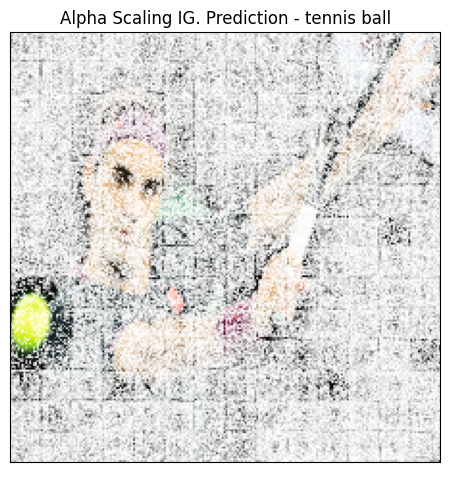

(<Figure size 600x600 with 2 Axes>,
 <AxesSubplot:title={'center':'Alpha Scaling IG. Prediction - tennis ball'}>)

In [51]:
explainer.visualize(method="alpha_scaling",outlier_threshold=0.15,sign="absolute")

In [25]:
predicted_calss = explainer.id2label[explainer.predicted_index]

In [26]:
np_attributions = np.transpose(explainer.attributions.squeeze().cpu().detach().numpy(), (1, 2, 0))
np_image = np.transpose(explainer.inputs["pixel_values"].squeeze().cpu().detach().numpy(), (1, 2, 0))

In [27]:
from captum.attr import visualization as viz

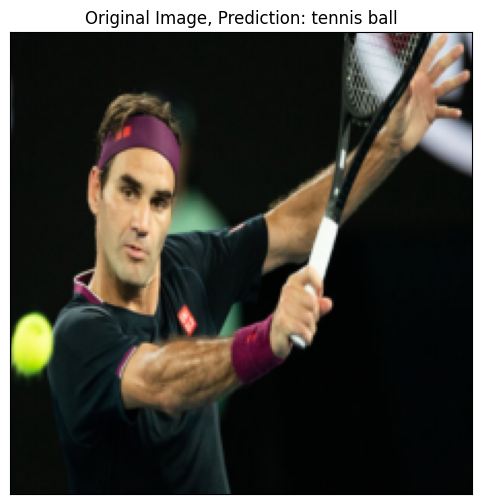

In [28]:
img = viz.visualize_image_attr(None, new_np, 
                      method="original_image", title=f"Original Image, Prediction: {predicted_calss}")

In [50]:
type(img[1])

matplotlib.axes._subplots.AxesSubplot

In [84]:
img = viz.visualize_image_attr(np_attributions, np_image, method="masked_image",sign="absolute_value",
                          show_colorbar=True, title=f"Overlayed IG. Prediction - {predicted_calss}", outlier_perc=10,alpha_overlay=0.5,use_pyplot=False)

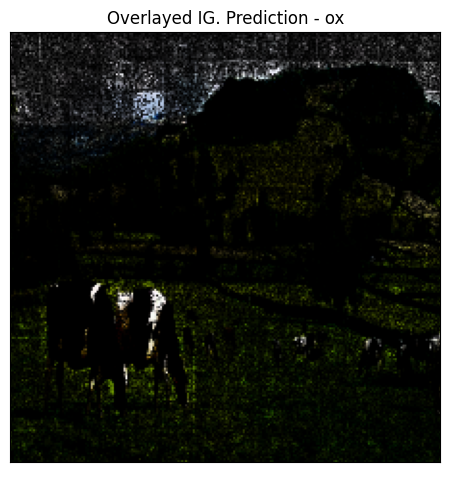

In [85]:
img[0]

In [15]:
from captum.attr import visualization as viz
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
from torchvision import transforms


ModuleNotFoundError: No module named '_lzma'

In [ ]:
transform = transforms.Compose([
 transforms.Resize(256),
 transforms.CenterCrop(224),
 transforms.ToTensor()
])

transform_normalize = transforms.Normalize(
     mean=[0.485, 0.456, 0.406],
     std=[0.229, 0.224, 0.225]
 )


transformed_img = transform(image)

In [11]:
default_cmap = LinearSegmentedColormap.from_list('custom blue', 
                                                 [(0, '#ffffff'),
                                                  (0.25, '#000000'),
                                                  (1, '#000000')], N=256)

_ = viz.visualize_image_attr(np.transpose(explainer.attributions.squeeze().cpu().detach().numpy(), (1,2,0)),
                             np.transpose(transformed_img.squeeze().cpu().detach().numpy(), (1,2,0)),
                             method='heat_map',
                             cmap=default_cmap,
                             show_colorbar=True,
                             sign='positive',
                             outlier_perc=1)

AttributeError: squeeze